In [18]:
import geopandas
import numpy
import geoplanar
from libpysal.graph import Graph
from shapely.geometry import Polygon


# Planar Enforcement Violation: non-planar enforced touches

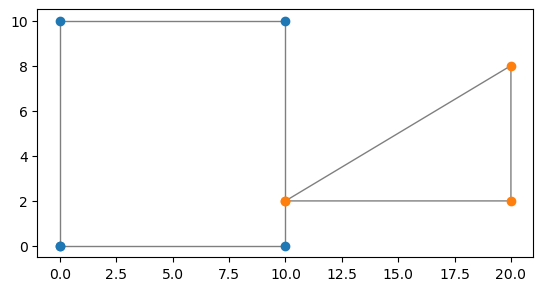

In [35]:
c1 = [[0,0], [0, 10], [10, 10], [10, 0], [0, 0]]
p1 = Polygon(c1)
c2 = [[10, 2], [20, 8], [20, 2], [10, 2]]
p2 = Polygon(c2)
gdf = geopandas.GeoDataFrame(geometry=[p1, p2])
base = gdf.plot(edgecolor='k', facecolor="none",alpha=0.5)
c1 = numpy.array(c1)
c2 = numpy.array(c2)
_ = base.scatter(c1[:,0], c1[:,1])
_ =base.scatter(c2[:,0], c2[:,1])



The two polygons are visually contiguous share no vertices. This will result in the two polygons not being Queen neighbors, since a necessary (and sufficient) condition for the latter is at least one shared vertex.

In [30]:
queen = Graph.build_contiguity(gdf, rook=False)
queen.adjacency

focal  neighbor
0      0           0
1      1           0
Name: weight, dtype: int64

## Detecting nonplanar touches

`geoplanar` can detect and report nonplanar edges:

In [26]:
non_planar = geoplanar.non_planar_edges(gdf)
non_planar.neighbors

{0: (1,), 1: (0,)}

You can visualise the resulting Graph encoding nonplanar relations.

<Axes: >

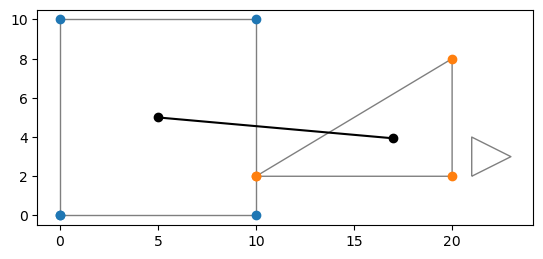

In [22]:
base = gdf.plot(edgecolor='k', facecolor="none",alpha=0.5)
c1 = numpy.array(c1)
c2 = numpy.array(c2)
_ = base.scatter(c1[:,0], c1[:,1])
_ =base.scatter(c2[:,0], c2[:,1])
non_planar.plot(gdf, ax=base)

## Fixing nonplanar edges

In [23]:
gdf1 = geoplanar.fix_npe_edges(gdf)

/Users/martin/miniforge3/envs/geoplanar/lib/python3.12/site-packages/shapely/set_operations.py:131: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


In [27]:
non_planar = geoplanar.non_planar_edges(gdf1)
non_planar.neighbors

{0: (), 1: ()}

In [29]:
queen1 = Graph.build_contiguity(gdf1, rook=False)
queen1.adjacency

focal  neighbor
0      1           1
1      0           1
Name: weight, dtype: int64

## Default is to work on a copy

In [36]:
npe = geoplanar.non_planar_edges(gdf)
npe.neighbors

{0: (1,), 1: (0,)}

In [37]:
geoplanar.fix_npe_edges(gdf, inplace=True)

/Users/martin/miniforge3/envs/geoplanar/lib/python3.12/site-packages/shapely/set_operations.py:131: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


,geometry
0,"POLYGON ((0.00000 0.00000, 0.00000 10.00000, 1..."
1,"POLYGON ((10.00000 2.00000, 20.00000 8.00000, ..."


In [38]:
npe = geoplanar.non_planar_edges(gdf)
npe.neighbors

{0: (), 1: ()}

In [39]:
queen1 = Graph.build_contiguity(gdf, rook=False)
queen1.adjacency

focal  neighbor
0      1           1
1      0           1
Name: weight, dtype: int64

## Handle MultiPolygons

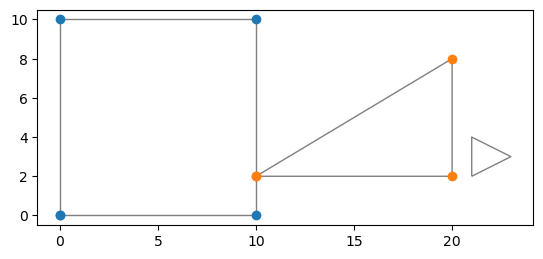

In [40]:
from shapely.geometry import MultiPolygon
c1 = [[0,0], [0, 10], [10, 10], [10, 0], [0, 0]]
p1 = Polygon(c1)
c2 = [[10, 2], [20, 8], [20, 2], [10, 2]]
p3 = Polygon([ [21, 2], [21, 4], [23,3] ])

#p2 = Polygon(c2)
p2 = MultiPolygon([Polygon(c2), p3])

gdf = geopandas.GeoDataFrame(geometry=[p1, p2])
base = gdf.plot(edgecolor='k', facecolor="none",alpha=0.5)
c1 = numpy.array(c1)
c2 = numpy.array(c2)
_ = base.scatter(c1[:,0], c1[:,1])
_ =base.scatter(c2[:,0], c2[:,1])



In [41]:
res = geoplanar.non_planar_edges(gdf)

In [42]:
res.neighbors

{0: (1,), 1: (0,)}

In [43]:
gdf1 = geoplanar.fix_npe_edges(gdf)


/Users/martin/miniforge3/envs/geoplanar/lib/python3.12/site-packages/shapely/set_operations.py:131: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


In [44]:
gdf1.geometry[0].wkt

'POLYGON ((0 0, 0 10, 10 10, 10 2, 10 0, 0 0))'

In [45]:
gdf.geometry[0].wkt

'POLYGON ((0 0, 0 10, 10 10, 10 0, 0 0))'